<a href="https://colab.research.google.com/github/julhamarcolan/rmn_pulse_spectrum_analysis/blob/main/hard_pulse_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code illustrates the fundamental relationship between a rectangular (hard) pulse in the time domain and its frequency-domain excitation profile in NMR/MRI. A rectangular pulse of duration \(T_p\) has a Fourier transform with a sinc-like shape.

- The **main lobe** of the sinc corresponds to the range of frequencies effectively excited by the pulse.  
- The **side lobes** represent weaker, off-resonance excitation.

Key points:  
- **Short pulses** (small \(Tp\)) have a **wide main lobe**, exciting a broad range of frequencies.  
- **Long pulses** (large \(Tp\)) have a **narrow main lobe**, selectively exciting a smaller frequency band.

This demonstrates the fundamental trade-off in NMR/MRI between **pulse duration** and **excitation bandwidth**, which is critical for designing RF pulses that uniformly excite spins over a desired frequency range.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def fourier_transform(signal, dt_ms):
    """
    Compute the Fourier transform of a signal.

    Args:
        signal (np.ndarray): Input signal in time domain.
        dt_ms (float): Time step [ms].

    Returns:
        freq_kHz (np.ndarray): Frequency vector [kHz].
        spectrum (np.ndarray): Complex Fourier spectrum (fftshift applied).
    """

    N = len(signal)
    freq_per_ms = np.fft.fftfreq(N, dt_ms)   # units: 1/ms
    spectrum = np.fft.fftshift(np.fft.fft(signal))
    freq_per_ms = np.fft.fftshift(freq_per_ms)
    return freq_per_ms, spectrum


In [3]:
def hard_pulse(B1,Tp_ms, dt_ms, Ttot_ms):
    """
    Generate a rectangular (hard) pulse centered at t=0.

    Args:
        B1 (float): Pulse amplitude.
        Tp_ms (float): Pulse duration [ms].
        dt_ms (float): Time step [ms].
        Ttot_ms (float): Total simulation window [ms].

    Returns:
        t_ms (np.ndarray): Time vector [ms].
        pulse (np.ndarray): Rectangular pulse.
    """

    N = int(Ttot_ms / dt_ms)
    t_ms = np.arange(-N//2, N//2) * dt_ms
    pulse = B1 * (np.heaviside(t_ms + Tp_ms/2, 1) - np.heaviside(t_ms - Tp_ms/2, 1))
    return t_ms, pulse


**Hard Pulse**

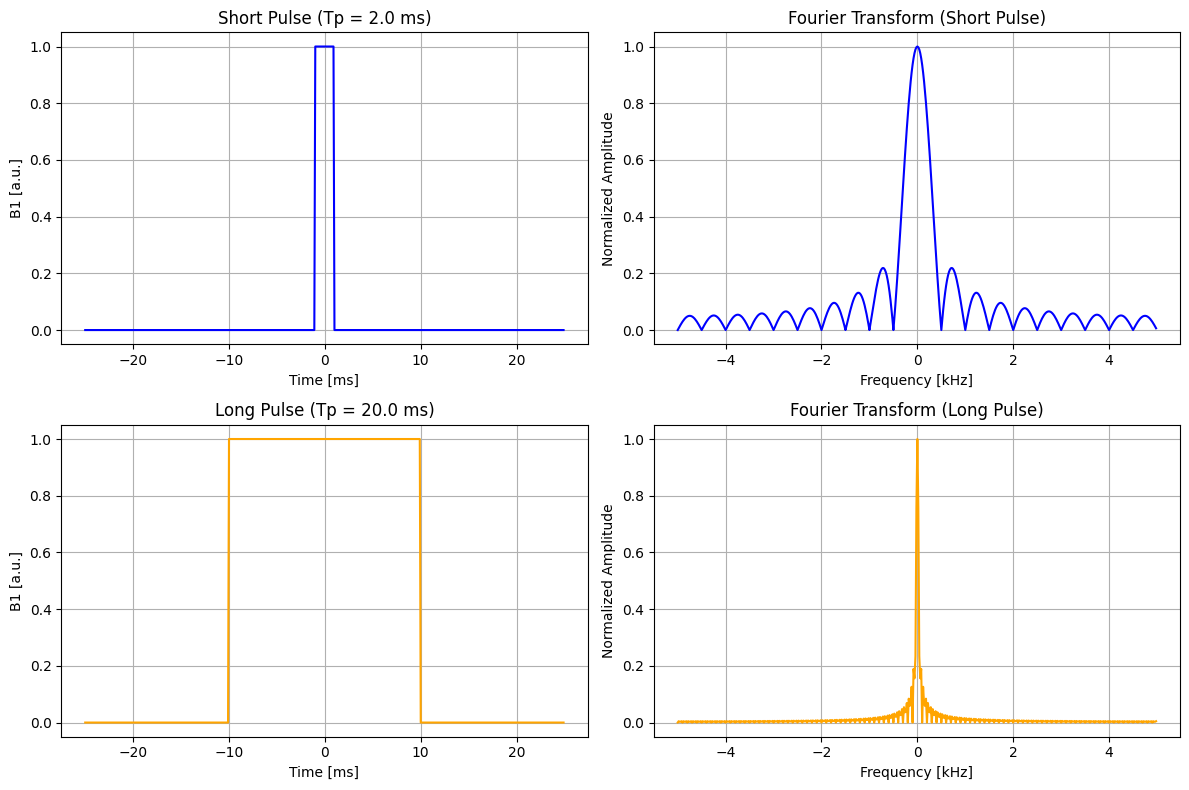

In [15]:
# Parameters
dt_ms = 0.1     # time step [ms]
Ttot_ms = 50.0  # total simulation time [ms]

# Short pulse
B1_short = 1.0
Tp_short_ms = 2.0
t_short, pulse_short = hard_pulse(B1_short, Tp_short_ms, dt_ms, Ttot_ms)
freq_short, spectrum_short = fourier_transform(pulse_short, dt_ms)
spectrum_short_mag = np.abs(spectrum_short) / np.max(np.abs(spectrum_short))

# Long pulse
B1_long = 1.0
Tp_long_ms = 20.0
t_long, pulse_long = hard_pulse(B1_long, Tp_long_ms, dt_ms, Ttot_ms)
freq_long, spectrum_long = fourier_transform(pulse_long, dt_ms)
spectrum_long_mag = np.abs(spectrum_long) / np.max(np.abs(spectrum_long))


plt.figure(figsize=(12,8))

# (1) Short pulse
plt.subplot(2,2,1)
plt.plot(t_short, pulse_short, color="blue")
plt.title(f"Short Pulse (Tp = {Tp_short_ms} ms)")
plt.xlabel("Time [ms]")
plt.ylabel("B1 [a.u.]")
plt.grid(True)

# (2) Fourier of short pulse
plt.subplot(2,2,2)
plt.plot(freq_short, spectrum_short_mag, color="blue")
plt.title("Fourier Transform (Short Pulse)")
plt.xlabel("Frequency [kHz]")
plt.ylabel("Normalized Amplitude")
plt.grid(True)

# (3) Long pulse
plt.subplot(2,2,3)
plt.plot(t_long, pulse_long, color="orange")
plt.title(f"Long Pulse (Tp = {Tp_long_ms} ms)")
plt.xlabel("Time [ms]")
plt.ylabel("B1 [a.u.]")
plt.grid(True)

# (4) Fourier of long pulse
plt.subplot(2,2,4)
plt.plot(freq_long, spectrum_long_mag, color="orange")
plt.title("Fourier Transform (Long Pulse)")
plt.xlabel("Frequency [kHz]")
plt.ylabel("Normalized Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()
